In [11]:
# prompt: import pandas

import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# 1. 目標 url
url = "https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/banking/residential-mortgage-loans-neg-equity"

# 2. Header 在這網站不需要


# 3. 向目標發送請求(request)
response = requests.get(url)
print(response)                #200代表請求成功

# 4. 讀取 response 並進行decode
# 使用loads把資料轉為dict
dict_data = json.loads(response.content)

print(dict_data)
print(f"dict_data是{type(dict_data)}")

dump_data = dict_data["result"]["records"] #存取dict裡的list
print(dump_data)
print(f"dump_data是{type(dump_data)}")

with open("HKhouse outstanding loan ratio.txt", "w") as my_file:  #製作txt檔,用作排版json,
    write_data = json.dumps(dump_data)                #json模組的屬性dumps()將dump_data轉為str
    my_file.write(write_data)
print(f"write_data是{type(write_data)}")

<Response [200]>
{'header': {'success': True, 'err_code': '0000', 'err_msg': 'No error found'}, 'result': {'datasize': 33, 'records': [{'end_of_quarter': '2024-Q4', 'outstanding_loans': 38389, 'outstanding_loans_ratio': '6.5', 'outstanding_loans_amt': 195072, 'outstanding_loans_amt_ratio': '10.41', 'unsecured_portion_amt': 14517, 'lv_ratio': 1.08}, {'end_of_quarter': '2024-Q3', 'outstanding_loans': 40713, 'outstanding_loans_ratio': '6.89', 'outstanding_loans_amt': 207510, 'outstanding_loans_amt_ratio': '11.06', 'unsecured_portion_amt': 15778, 'lv_ratio': 1.08}, {'end_of_quarter': '2024-Q2', 'outstanding_loans': 30288, 'outstanding_loans_ratio': '5.13', 'outstanding_loans_amt': 154992, 'outstanding_loans_amt_ratio': '8.29', 'unsecured_portion_amt': 10003, 'lv_ratio': 1.07}, {'end_of_quarter': '2024-Q1', 'outstanding_loans': 32073, 'outstanding_loans_ratio': '5.47', 'outstanding_loans_amt': 165349, 'outstanding_loans_amt_ratio': '8.91', 'unsecured_portion_amt': 11223, 'lv_ratio': 1.07}, 

In [3]:
df = pd.DataFrame(dump_data)  #將dump_data由list檔案轉為pandas的df(dataframe)
col_name=["日期","負資產住宅按揭貸款宗數","佔整體住宅按揭貸款宗數的百分比","未償還貸款金額(百萬)","佔未償還貸款總額的百分比","貸款中無抵押部分的金額(百萬)","按揭比率"]
df = df.set_axis(col_name, axis=1)
df

,日期,負資產住宅按揭貸款宗數,佔整體住宅按揭貸款宗數的百分比,未償還貸款金額(百萬),佔未償還貸款總額的百分比,貸款中無抵押部分的金額(百萬),按揭比率
0,2024-Q4,38389,6.5,195072,10.41,14517.00,1.08
1,2024-Q3,40713,6.89,207510,11.06,15778.00,1.08
2,2024-Q2,30288,5.13,154992,8.29,10003.00,1.07
3,2024-Q1,32073,5.47,165349,8.91,11223.00,1.07
4,2023-Q4,25163,4.29,131297,7.07,7314.00,1.06
5,2023-Q3,11123,1.9,59263,3.19,1981.00,1.03
6,2023-Q2,3341,0.57,17351,0.94,305.00,1.02
7,2023-Q1,6379,1.1,34362,1.89,725.00,1.02
8,2022-Q4,12164,2.1,66252,3.66,2517.00,1.04
9,2022-Q3,533,0.09,3006,0.17,59.00,1.02


In [4]:
df["佔整體住宅按揭貸款宗數的百分比"]=df["佔整體住宅按揭貸款宗數的百分比"].str.replace("*","0")    #將oustanding_loans_ratio裡的str"*"轉為str"0"
df["佔整體住宅按揭貸款宗數的百分比"]=df["佔整體住宅按揭貸款宗數的百分比"].astype(float)           #將oustanding_loans_ratio的變數類型由str轉為float

df["佔未償還貸款總額的百分比"]=df["佔未償還貸款總額的百分比"].str.replace("*","0")  #將oustanding_loans_amt_ratio裡的str"*"轉為str"0"
df["佔未償還貸款總額的百分比"]=df["佔未償還貸款總額的百分比"].astype(float)         #將oustanding_loans_amt_ratio的變數類型由str轉為float

#df["按揭比率"]=df["按揭比率"].float.replace( )         #如果要將lv_ratio裡的NaN值填為0才需要這行程式碼

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df.loc[df["負資產住宅按揭貸款宗數"]>20000]   #將香港住宅貸款負資產宗數超過20000宗的資料列出

,日期,負資產住宅按揭貸款宗數,佔整體住宅按揭貸款宗數的百分比,未償還貸款金額(百萬),佔未償還貸款總額的百分比,貸款中無抵押部分的金額(百萬),按揭比率
0,2024-Q4,38389,6.50,195072,10.41,14517.0,1.08
1,2024-Q3,40713,6.89,207510,11.06,15778.0,1.08
2,2024-Q2,30288,5.13,154992,8.29,10003.0,1.07
3,2024-Q1,32073,5.47,165349,8.91,11223.0,1.07
4,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06


In [7]:
df.loc[df["佔整體住宅按揭貸款宗數的百分比"]>1]   #將負資產宗數佔整體住宅貸款宗數超過1%的資料列出

,日期,負資產住宅按揭貸款宗數,佔整體住宅按揭貸款宗數的百分比,未償還貸款金額(百萬),佔未償還貸款總額的百分比,貸款中無抵押部分的金額(百萬),按揭比率
0,2024-Q4,38389,6.50,195072,10.41,14517.0,1.08
1,2024-Q3,40713,6.89,207510,11.06,15778.0,1.08
2,2024-Q2,30288,5.13,154992,8.29,10003.0,1.07
3,2024-Q1,32073,5.47,165349,8.91,11223.0,1.07
4,2023-Q4,25163,4.29,131297,7.07,7314.0,1.06
5,2023-Q3,11123,1.90,59263,3.19,1981.0,1.03
7,2023-Q1,6379,1.10,34362,1.89,725.0,1.02
8,2022-Q4,12164,2.10,66252,3.66,2517.0,1.04


In [8]:
df.loc[df["按揭比率"]>=1.04] #NaN不影響揀選資料

,日期,負資產住宅按揭貸款宗數,佔整體住宅按揭貸款宗數的百分比,未償還貸款金額(百萬),佔未償還貸款總額的百分比,貸款中無抵押部分的金額(百萬),按揭比率
0,2024-Q4,38389,6.50,195072,10.41,14517.00,1.08
1,2024-Q3,40713,6.89,207510,11.06,15778.00,1.08
2,2024-Q2,30288,5.13,154992,8.29,10003.00,1.07
3,2024-Q1,32073,5.47,165349,8.91,11223.00,1.07
4,2023-Q4,25163,4.29,131297,7.07,7314.00,1.06
8,2022-Q4,12164,2.10,66252,3.66,2517.00,1.04
13,2021-Q3,3,0.00,9,0.00,0.33,1.04
14,2021-Q2,5,0.00,21,0.00,1.00,1.05
19,2020-Q1,384,0.07,1867,0.13,81.00,1.05
22,2019-Q2,1,0.00,3,0.00,0.12,1.04


In [9]:
df2=df.iloc[ : :-1]   #將df反向切片放入df2,切片後的index會被反轉為由大到小
df2 = df2.reset_index(drop=True)   #將df2的index重設為由0開始, https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
df2

,日期,負資產住宅按揭貸款宗數,佔整體住宅按揭貸款宗數的百分比,未償還貸款金額(百萬),佔未償還貸款總額的百分比,貸款中無抵押部分的金額(百萬),按揭比率
0,2016-Q4,4,0.00,11,0.00,0.08,1.01
1,2017-Q1,0,0.00,0,0.00,0.00,NaN
2,2017-Q2,0,0.00,0,0.00,0.00,NaN
3,2017-Q3,0,0.00,0,0.00,0.00,NaN
4,2017-Q4,0,0.00,0,0.00,0.00,NaN
5,2018-Q1,0,0.00,0,0.00,0.00,NaN
6,2018-Q2,0,0.00,0,0.00,0.00,NaN
7,2018-Q3,0,0.00,0,0.00,0.00,NaN
8,2018-Q4,258,0.05,1170,0.09,57.00,1.05
9,2019-Q1,43,0.00,226,0.00,5.00,1.02


In [10]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download    #令matplotlib模組可以顯示中文
import matplotlib
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

FileNotFoundError: [Errno 2] No such file or directory: 'TaipeiSansTCBeta-Regular.ttf'

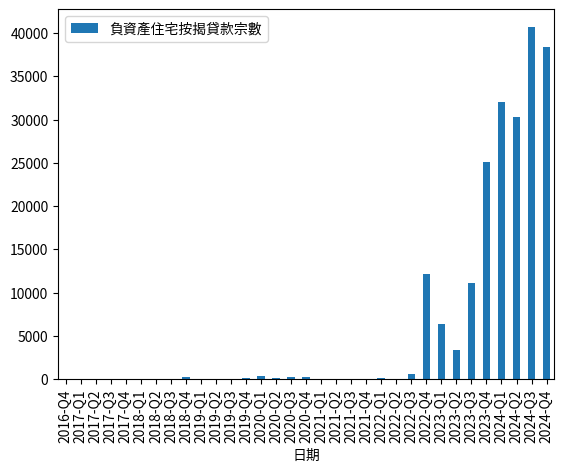

In [ ]:
df3 = pd.DataFrame(df2, columns=["日期", "負資產住宅按揭貸款宗數"])
df3
df3 = df3.set_index("日期")
df3.plot(kind="bar")
plt.show()

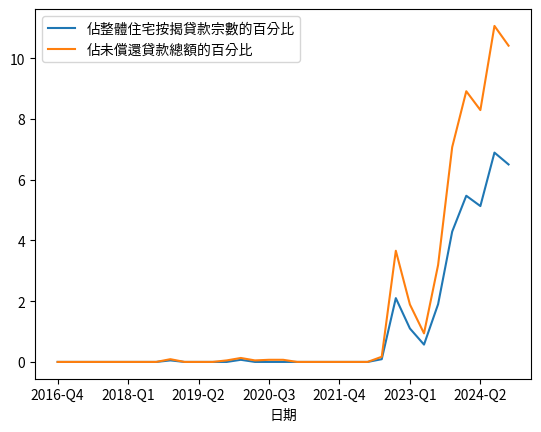

In [ ]:
df4 = pd.DataFrame(df2, columns=["日期", "佔整體住宅按揭貸款宗數的百分比","佔未償還貸款總額的百分比"])
df4
df4 = df4.set_index("日期")
df4.plot(kind="line")
plt.show()

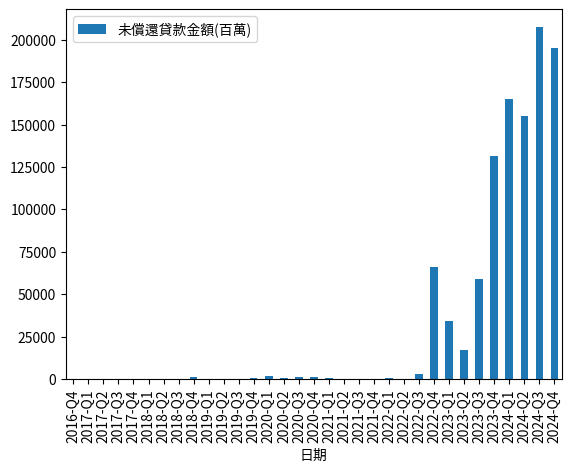

In [ ]:
df5 = pd.DataFrame(df2, columns=["日期", "未償還貸款金額(百萬)"])
df5
df5 = df5.set_index("日期")
df5.plot(kind="bar")
plt.show()

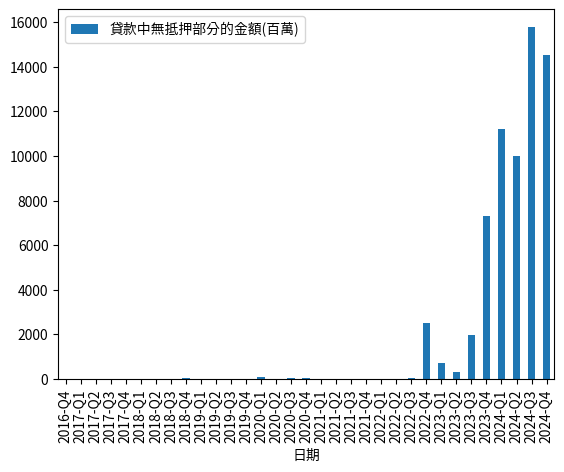

In [ ]:
df6 = pd.DataFrame(df2, columns=["日期", "貸款中無抵押部分的金額(百萬)"])
df6
df6 = df6.set_index("日期")
df6.plot(kind="bar")
plt.show()

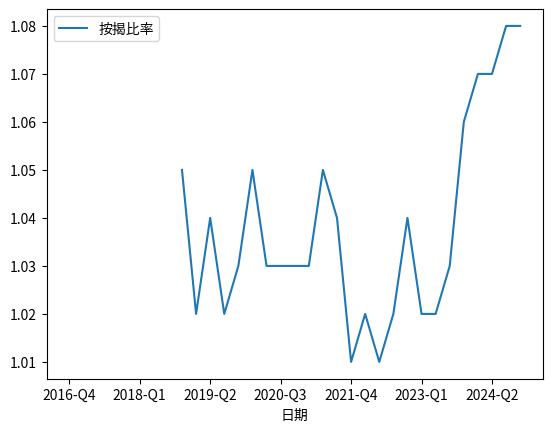

In [ ]:
df7 = pd.DataFrame(df2, columns=["日期", "按揭比率"])
df7
df7 = df7.set_index("日期")
df7.plot(kind="line")
plt.show()

In [ ]:
df.loc[df["負資產住宅按揭貸款宗數"]>20000].to_excel('hkhouse_loan.xlsx', sheet_name='負資產住宅按揭貸款宗數', index=False) #將符合條件的資料存入google drive裡的excel